In [1]:
import pandas as pd
df = pd.read_csv("log_fw_3.csv",sep=";",header=None)
df = df.drop(columns=9)
colonnes = ['date','ipsrc', 'ipdst','proto','portsrc','portdst','regle','action','interface','numtransp']
df.columns = colonnes
print(df.head())

                  date           ipsrc        ipdst proto  portsrc  portdst  \
0  2023-02-12 03:59:03   66.249.69.180  17.17.17.17   TCP  57630.0    443.0   
1  2023-02-12 03:59:04   66.249.69.178  17.17.17.17   TCP  63808.0    443.0   
2  2023-02-12 03:59:08  221.11.125.141  17.17.17.17   TCP  43123.0   2376.0   
3  2023-02-12 03:59:18  183.136.225.42  17.17.17.17   TCP   8088.0     70.0   
4  2023-02-12 03:59:20    38.32.112.34  17.17.17.17   TCP   6356.0    443.0   

   regle  action interface  numtransp  
0    1.0  PERMIT      eth0        6.0  
1    1.0  PERMIT      eth0        6.0  
2  999.0    DENY      eth0        6.0  
3  999.0    DENY      eth0        6.0  
4    1.0  PERMIT      eth0        6.0  


In [2]:
''' See if there is missing data '''
print(df.isnull().sum())

date         0
ipsrc        2
ipdst        2
proto        2
portsrc      2
portdst      2
regle        2
action       2
interface    2
numtransp    2
dtype: int64


In [3]:
''' Remove the missing data '''
df = df.dropna()

In [11]:
df["date"]=pd.to_datetime(df["date"],format="%Y-%m-%d %H:%M:%S")


df['heure'] = df['date'].dt.hour
df["jour_semaine"]=df["date"].dt.dayofweek
pd.get_dummies("proto",prefix="proto",drop_first=True)




var_selection = ["heure", "jour_semaine","portdst"]

''' Create the X and y variables '''
X = df[var_selection]
y = df["action"]



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
log_data_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA

pca = PCA()  # définir le nombre de composantes principales souhaitées
pca.fit_transform(log_data_scaled)
pcs = pca.components_
var_exp = pca.explained_variance_ratio_


NameError: name 'np' is not defined

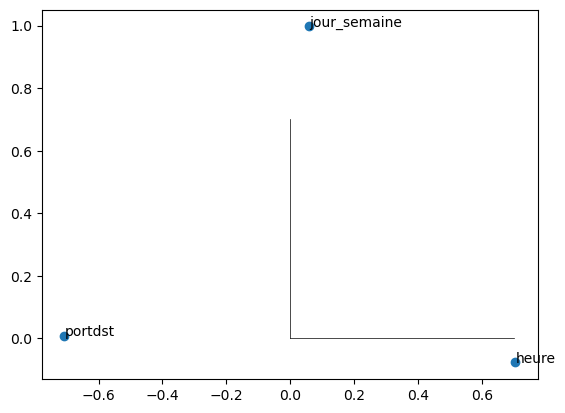

In [19]:
import matplotlib.pyplot as plt

plt.scatter(pcs[0], pcs[1])
# Ajouter les noms des variables à chaque point
for i, (x, y) in enumerate(zip(pcs[0], pcs[1])):
    plt.text(x, y, X.columns[i], fontsize='10')
# Ajouter des lignes représentant les axes
plt.plot([0, 0.7], [0, 0], color='black', linewidth=0.5)
plt.plot([0, 0], [0, 0.7], color='black', linewidth=0.5)
# Ajouter des cercles représentant les variances expliquées
for i, var in enumerate(var_exp):
    circle = plt.Circle((0,0), radius=np.sqrt(var), fill=False)
    plt.gca().add_artist(circle)
    plt.text(0.7, 0.1+i*0.1, 'Explained variance ratio {}: {:.2f}%'.format(i+1, var*100), transform=plt.gca().transAxes)
# Afficher le graphique
plt.show()
